<a href="https://colab.research.google.com/github/sainikhilrai/Deep-Learning/blob/master/BasicAutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# OM SRI SAI RAM

# Descr: Actual code to perform loss reserve prediction using Autoencoders

##############################
# Step 1 : Reading Sample Data and creating multiple LoBs
##############################

from __future__ import division
import numpy as np
import pandas as pd
import random
import sklearn
import os
import keras 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import copy

#os.environ["KERAS_BACKEND"] = "theano"
np.random.seed(7)
random.seed(7)
accident_years = np.arange(0,8,1)
development_years = np.arange(0,np.shape(accident_years)[0],1)

triangle = np.array(([1232,946,520,722,316,165,48,14],
                   [1469,1201,708,845, 461,235,56,18],
                   [1652,1416,959,954,605,287,69,21],
                   [1831,1634,1124,1087,725,314,79,24],
                   [2074,1919,1330,1240,756,359,91,28],
                   [2434,2263,1661,1540,909,432,109,33],
                   [2810,2108,1544,1565,924,439,111,34],
                   [3072,2614,1785,1810,1069,508,128,39]))

np.random.seed(7)
random.seed(7)
triangle3 = copy.deepcopy(triangle)
for i in range(np.shape(triangle)[1]):
    act_vals = copy.deepcopy(triangle[:,i])
    #print('act vals',act_vals)
    random.shuffle(act_vals)
    #print('act vals',act_vals)
    triangle3[:,i] = copy.deepcopy(act_vals)  
print(" T3", triangle3)
triangle = copy.deepcopy(triangle3)


Using TensorFlow backend.


 T3 [[2810 1634 1785 1087  756  235  109   39]
 [3072 1416 1330 1540  605  432   79   21]
 [1652 2614  959  954  725  314   48   33]
 [2074 1201 1661  845  909  508   69   34]
 [1232 2108  708 1810 1069  439  128   24]
 [1831  946  520 1240  461  165  111   18]
 [1469 1919 1124 1565  316  359   91   28]
 [2434 2263 1544  722  924  287   56   14]]


In [2]:
print(' Accident Years',accident_years)
print(' Developement Years',development_years)
print(' Input', triangle)


 Accident Years [0 1 2 3 4 5 6 7]
 Developement Years [0 1 2 3 4 5 6 7]
 Input [[2810 1634 1785 1087  756  235  109   39]
 [3072 1416 1330 1540  605  432   79   21]
 [1652 2614  959  954  725  314   48   33]
 [2074 1201 1661  845  909  508   69   34]
 [1232 2108  708 1810 1069  439  128   24]
 [1831  946  520 1240  461  165  111   18]
 [1469 1919 1124 1565  316  359   91   28]
 [2434 2263 1544  722  924  287   56   14]]


In [3]:
# Cum calc
import copy
C = np.zeros(shape=(np.shape(triangle)[0],np.shape(triangle)[1]))

C = copy.deepcopy(triangle)
tr_ratio = 0.7
train_pct = int(tr_ratio * np.shape(triangle)[1])
tr_vals = []
for i in range(np.shape(triangle)[0]):
    for j in range(np.shape(triangle)[1]-i):
        if(j > 0 and j <= train_pct):
            tr_vals.append(C[i,j])                        
        else:
            pass
print('C',C)
C_min = 0
#C_max  = np.max(tr_vals)
C_max = 1
print('C min max', C_min, C_max)
C = np.array([(x - C_min) /(C_max) for x in C])
#print('C_max',C_max)
print('C',C)
import copy
D = np.zeros(triangle.shape[1])
D_prev = [1]
for i in range(C.shape[1]):
    D[i] = np.mean(C[:C.shape[0]-i,i])
    D_prev.append(D[i])
D_prev = np.array(D_prev)
print(D)
print(D_prev)


C [[2810 1634 1785 1087  756  235  109   39]
 [3072 1416 1330 1540  605  432   79   21]
 [1652 2614  959  954  725  314   48   33]
 [2074 1201 1661  845  909  508   69   34]
 [1232 2108  708 1810 1069  439  128   24]
 [1831  946  520 1240  461  165  111   18]
 [1469 1919 1124 1565  316  359   91   28]
 [2434 2263 1544  722  924  287   56   14]]
C min max 0 1
C [[2810. 1634. 1785. 1087.  756.  235.  109.   39.]
 [3072. 1416. 1330. 1540.  605.  432.   79.   21.]
 [1652. 2614.  959.  954.  725.  314.   48.   33.]
 [2074. 1201. 1661.  845.  909.  508.   69.   34.]
 [1232. 2108.  708. 1810. 1069.  439.  128.   24.]
 [1831.  946.  520. 1240.  461.  165.  111.   18.]
 [1469. 1919. 1124. 1565.  316.  359.   91.   28.]
 [2434. 2263. 1544.  722.  924.  287.   56.   14.]]
[2071.75       1691.14285714 1160.5        1247.2         748.75
  327.           94.           39.        ]
[1.00000000e+00 2.07175000e+03 1.69114286e+03 1.16050000e+03
 1.24720000e+03 7.48750000e+02 3.27000000e+02 9.40000000e+

In [4]:
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

print(np.shape(accident_years)[0])
get_one_hot(accident_years,np.shape(accident_years)[0])

8


array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [9]:
###########################
# Step 2 : Prepare Data
###########################

a_yr = get_one_hot(accident_years,np.shape(accident_years)[0])
dev_yr = get_one_hot(development_years,np.shape(development_years)[0])

print(a_yr)
print(dev_yr)



print("Train Pct", train_pct)
# Prepare Data
train_data = []
valid_data = []
for i in range(np.shape(triangle)[0]):
    for j in range(np.shape(triangle)[1]-i):
        if(j > 0 and j <= train_pct):
            #train_data.append([a_yr[i],dev_yr[j],C[i,j-1], D[j],D_prev[j],C[i,j]])                        
            train_data.append(np.hstack((a_yr[i],dev_yr[j],C[i,j-1], D[j],C[i,j])))                        
            #train_data.append([a_yr[i],dev_yr[j],C[i,j-1], C[i,j]])                        
            #train_data.append([a_yr[i],dev_yr[j],C[i,j]])                        
        else:
            #train_data.append([a_yr[i],dev_yr[j],D[j],D[j],D_prev[j],C[i,j]])
            train_data.append(np.hstack((a_yr[i],dev_yr[j],D[j],D[j],C[i,j])))
            #train_data.append([a_yr[i],dev_yr[j],D[j],C[i,j]])
            #train_data.append([a_yr[i],dev_yr[j],C[i,j]])                        
    #valid_data.append(train_data[len(train_data)-1])
    #train_data = train_data[:len(train_data)-1]
   
test_data = []
for i in range(1,np.shape(triangle)[0]):
    for j in range(np.shape(triangle)[1]-i,np.shape(triangle)[1]):
        if(j > 0 and j <= train_pct):
            #test_data.append([a_yr[i],dev_yr[j],C[i,j-1], D[j],D_prev[j],C[i,j]])            
            test_data.append(np.hstack((a_yr[i],dev_yr[j],C[i,j-1], D[j],C[i,j])))            
            #test_data.append([a_yr[i],dev_yr[j],C[i,j-1],C[i,j]])            
            #test_data.append([a_yr[i],dev_yr[j],C[i,j]])            
        else:
            #test_data.append([a_yr[i],dev_yr[j],D[j],D[j],D_prev[j],C[i,j]])
            test_data.append(np.hstack((a_yr[i],dev_yr[j],D[j],D[j],C[i,j])))
            #test_data.append([a_yr[i],dev_yr[j],D[j],C[i,j]])
            #test_data.append([a_yr[i],dev_yr[j],C[i,j]])
        
train_data = np.array(train_data)
test_data = np.array(test_data)

valid_data = np.array(valid_data)

print(' Train Data',train_data)
print(' Valid Data', valid_data)
print(' Test Data', test_data)



#for i in range():
print(" Train Data Shape", train_data.shape)   
ip_dim = train_data.shape[1] -1
#print(test_data[0])

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]
Train Pct 5
 Train Data [[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.07175000e+03 2.07175000e+03 2.81000000e+03]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+0

In [0]:
################################
# Step 3 : Build Model using Neural Networks
# Note : MSE loss used here
###############################

import keras
import keras.backend as K
from keras import regularizers
from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential
from keras.callbacks import RemoteMonitor
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau

np.random.seed(7)
random.seed(7)
from keras import optimizers

In [0]:
def poisson_dev(y_true, y_pred):
    return 2*K.mean(y_pred - y_true -y_true*(K.log(K.clip(y_pred,K.epsilon(),None)) -K.log(K.clip(y_true,K.epsilon(),None))),axis=-1) 


In [12]:
#input_img = Input(shape=(4,))
batchSize = 1
x = Input(batch_shape=(batchSize, ip_dim))
encoded = Dense(ip_dim, activation='relu', kernel_initializer='normal')(x)
encoded = Dense(30, activation='relu')(encoded)
encoded = Dense(20, activation='relu')(encoded)
encoded = Dense(15, activation='relu')(encoded)
#encoded = Dense(10, activation='relu')(encoded)
#decoded = Dense(15, activation='relu')(encoded)
decoded = Dense(20, activation='relu')(encoded)
decoded = Dense(ip_dim, activation="relu")(decoded)

f_model = Model(x, decoded)
adam = optimizers.Adam(lr=0.1)
f_model.compile(loss="mse", optimizer='adam',metrics=['accuracy'])


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=0)
filepath="v5.best.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True)

history = f_model.fit(x=train_data[:,:ip_dim], y=train_data[:,:ip_dim], batch_size=batchSize, epochs=300, verbose=1, callbacks=[checkpointer,reduce_lr,early_stop], validation_split=0.3, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 25 samples, validate on 11 samples
Epoch 1/300
25/25 [==============================] - 0s 13ms/step - loss: 237383.0107 - acc: 0.6800 - val_loss: 286467.5685 - val_acc: 0.6364
Epoch 2/300
25/25 [==============================] - 0s 2ms/step - loss: 206369.2977 - acc: 0.9200 - val_loss: 236205.4776 - val_acc: 0.6364
Epoch 3/300
25/25 [==============================] - 0s 2ms/step - loss: 142796.8214 - acc: 0.9200 - val_loss: 163658.7713 - val_acc: 0.6364
Epoch 4/300
25/25 [==============================] - 0s 1ms/step - loss: 99557.2917 - acc: 0.9200 - val_loss: 160664.8427 - val_acc: 0.6364
Epoch 5/300
25/25 [==============================] - 0s 2ms/step - loss: 95794.3524 - acc: 0.9200 - val_loss: 156644.8244 - val_acc: 0.6364
Epoch 6/300
25/25 [==============================] - 0s 1ms/step - loss: 96531.2334 - acc: 0.9200 - val_loss: 157367.2505 - val_acc:

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


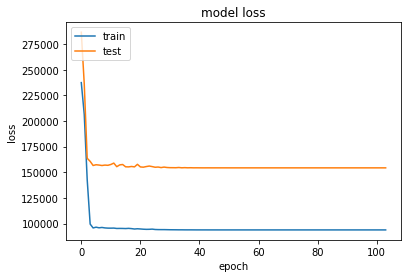

In [13]:
# summarize history for accuracy
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
#plt.ylim(ymax = 1)
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
# Loss
print(" Train Loss", sum(history.history['loss'])*C_max)
print(" Valid Loss", sum(history.history['val_loss'])*C_max)

 Train Loss 10105278.40508942
 Valid Loss 16328873.140625006


o [[   0.        0.        0.        0.        0.        0.        0.
     0.        0.        0.        0.        0.        0.        0.
     0.        0.     2071.6602    0.    ]]
<class 'numpy.ndarray'>


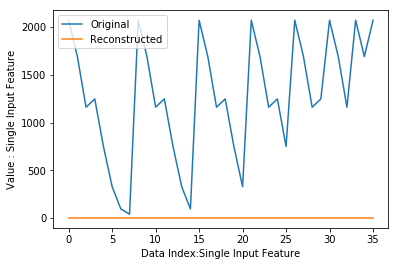

In [15]:
print('o',f_model.predict(train_data[:1,:ip_dim]))

model = Model(inputs=f_model.inputs, outputs=encoded)
print(type(train_data[0,:ip_dim]))
#print(test_data[:,:ip_dim])
AE_out = model.predict(train_data[:,:ip_dim])
#print(AE_out)
AE_out.shape


plt.figure()
plt.plot(train_data[:,ip_dim-1], label = "Original")
plt.plot(f_model.predict(train_data[:,:ip_dim])[:,ip_dim-1], label ="Reconstructed")
plt.xlabel("Data Index:Single Input Feature")
plt.ylabel("Value : Single Input Feature")
plt.legend()


In [16]:

import keras
import keras.backend as K
from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential
from keras import optimizers
from keras import regularizers

def poisson_dev(y_true, y_pred):
    return 2*K.mean(y_pred - y_true -y_true*(K.log(K.clip(y_pred,K.epsilon(),None)) -K.log(K.clip(y_true,K.epsilon(),None))),axis=-1) 

np.random.seed(7)
random.seed(7)

P_model = Sequential()
P_ip_dim = AE_out.shape[1]
print('P_ip_dim',P_ip_dim)
#model.add(Dropout(0.1, input_shape=(ip_dim,))
P_model.add(Dense(P_ip_dim, input_dim=P_ip_dim,activation="relu"))
#P_model.add(Dense(P_ip_dim*2, input_dim=P_ip_dim, activation='relu'))
#P_model.add(Dropout(0.01))
#P_model.add(Dense(int(P_ip_dim * 2), activation='elu'))
P_model.add(Dense(int(P_ip_dim * 3 /4),activation='relu'))
P_model.add(Dense(int(P_ip_dim * 1 /2), activation='relu'))
P_model.add(Dense(int(P_ip_dim * 1 /4), activation='relu'))
P_model.add(Dense(1,activation="relu"))
# Compile model
#adam = optimizers.Adam(lr=0.1)
P_model.compile(loss="mae", optimizer="adam", metrics =['accuracy'])


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=0)
filepath="v5.best.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True)

history = P_model.fit(x=AE_out, y=train_data[:,ip_dim], batch_size=1, epochs=300, verbose=1, callbacks=[checkpointer,reduce_lr,early_stop], validation_split=0.3, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None)
#history = P_model.fit(x=AE_out, y=train_data[:,ip_dim], batch_size=batchSize, epochs=90, verbose=1, callbacks=[checkpointer,reduce_lr,early_stop], validation_split=0.2, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)


# serialize model to JSON
 
# later...



P_ip_dim 15
Train on 25 samples, validate on 11 samples
Epoch 1/300
25/25 [==============================] - 0s 12ms/step - loss: 1173.9503 - acc: 0.0000e+00 - val_loss: 1405.0600 - val_acc: 0.0000e+00
Epoch 2/300
25/25 [==============================] - 0s 1ms/step - loss: 1146.3927 - acc: 0.0000e+00 - val_loss: 1369.9376 - val_acc: 0.0000e+00
Epoch 3/300
25/25 [==============================] - 0s 1ms/step - loss: 1091.0856 - acc: 0.0000e+00 - val_loss: 1265.0859 - val_acc: 0.0000e+00
Epoch 4/300
25/25 [==============================] - 0s 1ms/step - loss: 940.4797 - acc: 0.0000e+00 - val_loss: 1050.7090 - val_acc: 0.0000e+00
Epoch 5/300
25/25 [==============================] - 0s 1ms/step - loss: 689.7284 - acc: 0.0000e+00 - val_loss: 715.9505 - val_acc: 0.0000e+00
Epoch 6/300
25/25 [==============================] - 0s 1ms/step - loss: 484.2674 - acc: 0.0000e+00 - val_loss: 614.9886 - val_acc: 0.0000e+00
Epoch 7/300
25/25 [==============================] - 0s 1ms/step - loss: 483.6

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


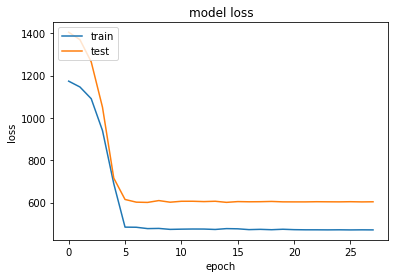

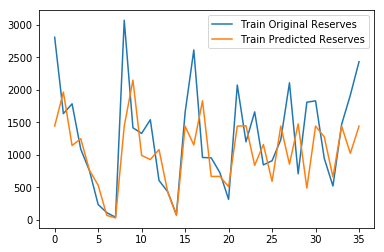

In [17]:
# summarize history for accuracy
import matplotlib.pyplot as plt
#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()

print(history.history.keys())
# summarize history for accuracy
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
#plt.ylim(ymax = 10000)
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.figure()
plt.plot(train_data[:,ip_dim], label = "Train Original Reserves")
plt.plot(P_model.predict(model.predict(train_data[:,:ip_dim])), label ="Train Predicted Reserves")
plt.legend()
C_prev = copy.deepcopy(C)

In [18]:
# Loss
print(" Train Loss", sum(history.history['loss'])*C_max)
print(" Valid Loss", sum(history.history['val_loss'])*C_max)

print(" Train Loss", sum(history.history['loss']))
print(" Valid Loss", sum(history.history['val_loss']))


 Train Loss 15955.94069747925
 Valid Loss 19716.34583074396
 Train Loss 15955.94069747925
 Valid Loss 19716.34583074396


In [19]:
# load json and create model
#from keras.models import model_from_json
#json_file = open('base_model.json', 'r')
#loaded_model_json = json_file.read()
#json_file.close()
#loaded_model = model_from_json(loaded_model_json)
# load weights into new model
#loaded_model.load_weights("base_model.h5")
#print("Loaded model from disk")
#model = loaded_model
#test_data.append(np.hstack((a_yr[i],dev_yr[j],D[j],D[j],C[i,j])))

C_test = np.zeros(shape=(np.shape(triangle)[0],np.shape(triangle)[1]))

#test_data = []
for i in range(1,np.shape(triangle)[0]):
    for j in range(np.shape(triangle)[1]-i):
        if(j > 0 and j <= train_pct):
            #print('C prev for  j =0',i,j,C_prev[i,j])
            C_test[i,j] = C_prev[i,j]
            #test_data.append([a_yr[i],dev_yr[j],C[i,j-1], D[j],D_prev[j],C[i,j]])            
            #test_data.append(np.hstack((a_yr[i],dev_yr[j],C[i,j-1], D[j],C[i,j])))            
            #test_data.append([a_yr[i],dev_yr[j],C[i,j-1],C[i,j]])            
            #test_data.append([a_yr[i],dev_yr[j],C[i,j]])            
        else:
            #test_data.append([a_yr[i],dev_yr[j],D[j],D[j],D_prev[j],C[i,j]])
            #test_data.append(np.hstack((a_yr[i],dev_yr[j],D[j],D[j],C[i,j])))
            C_test[i,j] = D[j]
            #test_data.append([a_yr[i],dev_yr[j],D[j],C[i,j]])
            #test_data.append([a_yr[i],dev_yr[j],C[i,j]])
 
print('C',C)
print('C test', C_test)

#print(type(np.hstack((a_yr[3],dev_yr[5],C[3,4], D[5]))))
print(np.shape(test_data[0]))
#print(test_data[0][:ip_dim].shape)

t_data = []
t_data.append(train_data[:1,:ip_dim])
#t_data.append(train_data[0][:ip_dim])
#t_data.append(test_data[0][:ip_dim])

#print(np.reshape(test_data[0][:ip_dim],-1))
model.predict(t_data[:])
#model.predict(np.hstack((a_yr[3],dev_yr[5],C[3,4], D[5])))

test_data = []
for i in range(1,np.shape(triangle)[0]):
    for j in range(np.shape(triangle)[1]-i,np.shape(triangle)[1]): 
        if(j > 0 and j <= train_pct):
            #print("i,j",i,j)
            #test_data.append([a_yr[i],dev_yr[j],C[i,j-1], D[j],C[i,j]])    
            t = []            
            t.append(np.hstack((a_yr[i],dev_yr[j],C_prev[i,j-1], D[j])))  
            print('out',P_model.predict(model.predict(np.array(t[:ip_dim]))))
            #print(model.predict(np.array(t[:ip_dim])))
            C_test[i,j] = P_model.predict(model.predict(np.array(t[:ip_dim])))[0]
            test_data.append([a_yr[i],dev_yr[j],C_prev[i,j-1], D[j],C_prev[i,j],C_test[i,j]])    
            #test_data.append([a_yr[i],dev_yr[j],C[i,j-1],C[i,j]])            
            #test_data.append([a_yr[i],dev_yr[j],C[i,j]])            
        else:
             
            t = []            
            t.append(np.hstack((a_yr[i],dev_yr[j],C_test[i,j-1], D[j])))  
            print('out',P_model.predict(model.predict(np.array(t[:ip_dim]))))
            #print(model.predict(np.array(t[:ip_dim])))
            C_test[i,j] = P_model.predict(model.predict(np.array(t[:ip_dim])))[0]
            test_data.append([a_yr[i],dev_yr[j],C_test[i,j-1], D[j],C_prev[i,j], C_test[i,j]])   
            #print("i,j",i,j)
            #test_data.append([a_yr[i],dev_yr[j],D[j],D[j],D_prev[j],C[i,j]])
            #test_data.append(np.hstack((a_yr[i],dev_yr[j],C_test[i,j-1],D[j],C[i,j])))
            #test_data.append([a_yr[i],dev_yr[j],D[j],C[i,j]])
            #test_data.append([a_yr[i],dev_yr[j],C[i,j]])

print('C_test', pd.DataFrame(C_test))
#print(' Test data', test_data)
#C_test = pd.DataFrame([x * C_max + C_min for x in C_test]).values
#print('C_test', pd.DataFrame(C_test))


pred_reserve = []
preds = []
actuals = []
for i in range(1,np.shape(triangle)[0]):
    j = np.shape(triangle)[1]-1-i
    #print(i,j)
    #print('last known',C[i,j])    
    #print(' last estimate',C_test[i,np.shape(triangle)[1]-1])
    actuals.append(C_prev[i,np.shape(triangle)[1]-1])
    preds.append(C_test[i,np.shape(triangle)[1]-1])
    #pred_reserve.append(C_test[i,np.shape(triangle)[1]-1] -C[i,j])

   
#actuals = [x * C_max + C_min for x in actuals]
#preds = [x * C_max + C_min for x in preds]
#print("Actuals",actuals)
#print(" Predictions",preds)
#print('diff',[x-y for x,y in zip(actuals,preds)])
#print(' sum diff', sum([x-y for x,y in zip(actuals,preds)]))



C [[2810. 1634. 1785. 1087.  756.  235.  109.   39.]
 [3072. 1416. 1330. 1540.  605.  432.   79.   21.]
 [1652. 2614.  959.  954.  725.  314.   48.   33.]
 [2074. 1201. 1661.  845.  909.  508.   69.   34.]
 [1232. 2108.  708. 1810. 1069.  439.  128.   24.]
 [1831.  946.  520. 1240.  461.  165.  111.   18.]
 [1469. 1919. 1124. 1565.  316.  359.   91.   28.]
 [2434. 2263. 1544.  722.  924.  287.   56.   14.]]
C test [[   0.      0.      0.      0.      0.      0.      0.      0.  ]
 [2071.75 1416.   1330.   1540.    605.    432.     94.      0.  ]
 [2071.75 2614.    959.    954.    725.    314.      0.      0.  ]
 [2071.75 1201.   1661.    845.    909.      0.      0.      0.  ]
 [2071.75 2108.    708.   1810.      0.      0.      0.      0.  ]
 [2071.75  946.    520.      0.      0.      0.      0.      0.  ]
 [2071.75 1919.      0.      0.      0.      0.      0.      0.  ]
 [2071.75    0.      0.      0.      0.      0.      0.      0.  ]]
(19,)
out [[66.84159]]
out [[219.01312]]
out 

 C max 1
 C test [array([0., 0., 0., 0., 0., 0., 0., 0.]), array([2071.75      , 1416.        , 1330.        , 1540.        ,
        605.        ,  432.        ,   94.        ,   66.84159088]), array([2071.75      , 2614.        ,  959.        ,  954.        ,
        725.        ,  314.        ,  219.01312256,  151.9559021 ]), array([2071.75      , 1201.        , 1661.        ,  845.        ,
        909.        ,  635.58703613,  437.78805542,  300.51916504]), array([2071.75      , 2108.        ,  708.        , 1810.        ,
       1267.17053223,  745.31005859,  513.1239624 ,  352.40933228]), array([2071.75      ,  946.        ,  520.        ,  358.01187134,
        868.54418945,  324.30770874,  225.71115112,  156.17481995]), array([2071.75      , 1919.        , 1343.0604248 ,  782.46081543,
       1097.40197754,  222.6837616 ,  156.64968872,  109.37187195]), array([2071.75      , 1700.9161377 , 1584.8145752 , 1077.65429688,
        504.51351929,  646.26068115,  445.50704956,  306.2

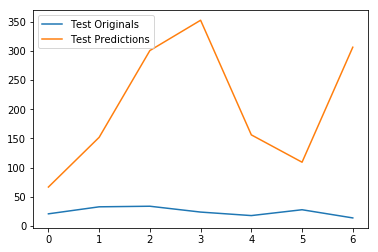

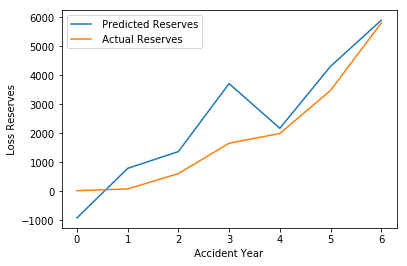

In [20]:
##############   
# RESERVE CALC
###############
print(' C max', C_max)
print(' C test',[x * C_max + C_min for x in C_test])
C = np.zeros(shape=(np.shape(triangle)[0],np.shape(triangle)[1]))
for i in range(np.shape(triangle)[0]):
    for j in range(np.shape(triangle)[1]):
        C[i,j] = sum(triangle[i,:j+1])
        
pred_reserve = []
act_pred = []
for i in range(1,np.shape(triangle)[0]):        
    j = np.shape(triangle)[1]-1-i
    #print(i,j)
    #print(C_test[:,i])
    pred_last = sum(C_test[i,:]) * C_max + C_min
    print(pred_last)
    act_pred.append(pred_last - C[i,j]) 

pred_reserve = sum(act_pred)


true_reserve = 0
act_real = []
for i in range(1,np.shape(triangle)[0]):
    j = np.shape(triangle)[1]-1-i
    #print(i,j)
    #print('last known',C[i,j])
    #print(' last estimate',C[i,np.shape(triangle)[1]-1])
    act_real.append(C[i,np.shape(triangle)[1]-1] -C[i,j])

#act_real = [1685 , 29379, 60638 ,101158 , 173802 , 249349 , 475992 , 763919 ,1459860  ]
true_reserve = sum(act_real)


print('Actuals', act_real)
print('Predictions', act_pred)
print(" Actual reserve",true_reserve)
print(" Predicted reserve",pred_reserve)
print(' Bias',(pred_reserve  - true_reserve))
print(' Perc',(pred_reserve - true_reserve) * 100/true_reserve)

"""    
AE_t_out = model.predict(test_data[:,:ip_dim])
#print('AE out', AE_t_out)
out = P_model.predict(AE_t_out)
#print(out)

"""

plt.figure()
plt.plot(actuals, label = "Test Originals")
plt.plot(preds, label ="Test Predictions")
plt.legend()

plt.figure()
plt.plot(act_pred, label=" Predicted Reserves")
plt.plot(act_real, label=" Actual Reserves")
plt.xlabel(" Accident Year ")
plt.ylabel(" Loss Reserves ")
plt.legend()

print(pd.DataFrame([x*C_max for x in C_test]))
print(triangle)